       popularity  danceability     energy        key   loudness       mode  \
count    50.00000     50.000000  50.000000  50.000000  50.000000  50.000000   
mean     51.06000      0.624600   0.598020   5.040000  -8.310040   0.580000   
std      15.76409      0.140877   0.212935   3.516492   2.514152   0.498569   
min      12.00000      0.303000   0.193000   0.000000 -14.149000   0.000000   
25%      41.00000      0.546000   0.436500   2.000000 -10.311000   0.000000   
50%      50.50000      0.650500   0.587500   4.000000  -8.245000   1.000000   
75%      66.75000      0.713500   0.785750   9.000000  -5.962250   1.000000   
max      74.00000      0.871000   0.951000  11.000000  -4.054000   1.000000   

       speechiness  acousticness  instrumentalness   liveness    valence  \
count    50.000000     50.000000         50.000000  50.000000  50.000000   
mean      0.085404      0.373145          0.031697   0.182580   0.574160   
std       0.077869      0.262903          0.133588   0.11963

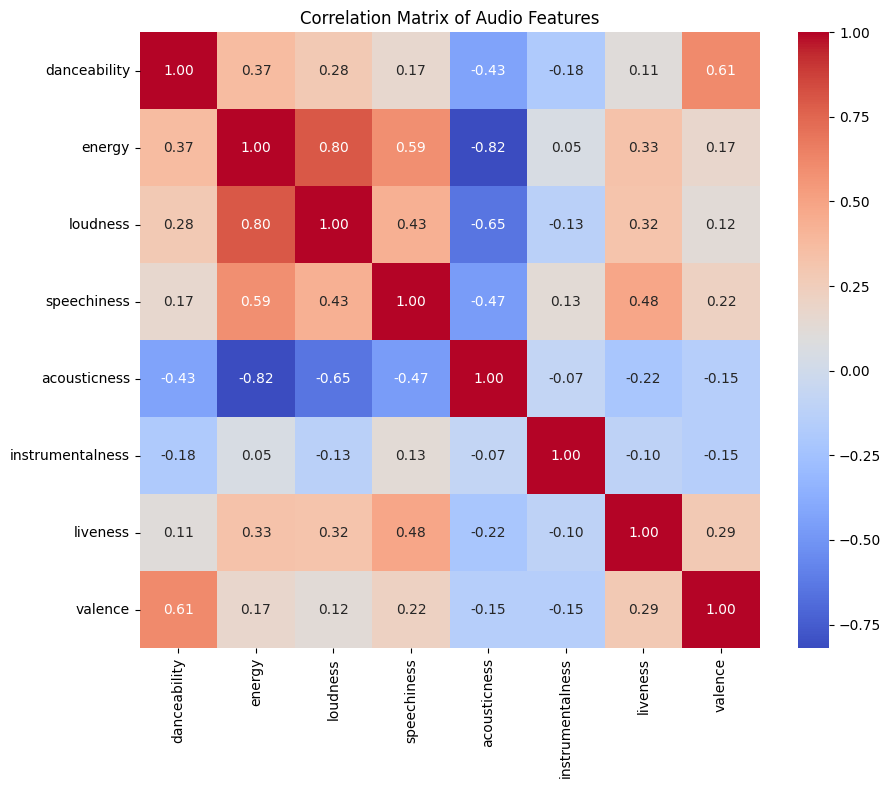

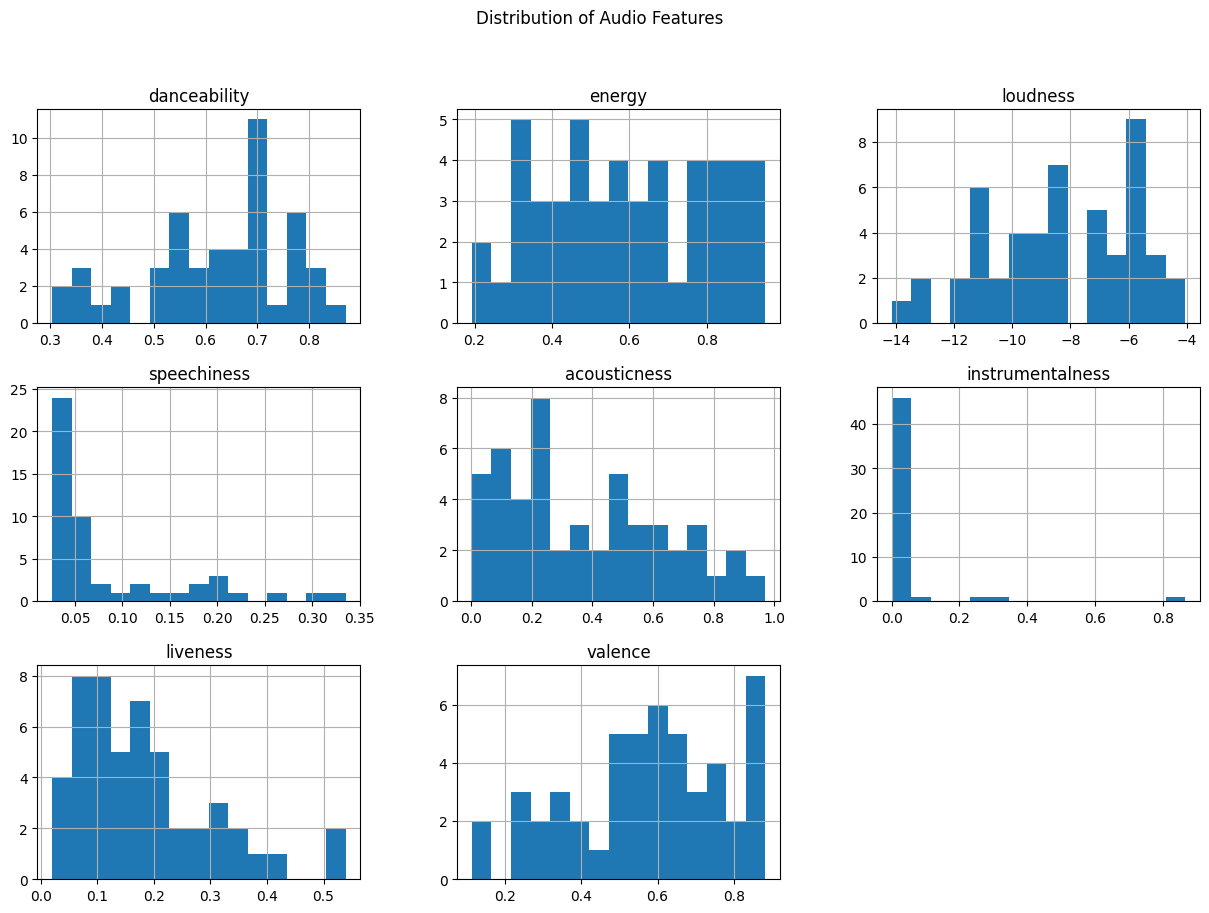

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df = pd.read_csv('myTracksforAnalysisJuly9.csv')

# Describe the data
print(df.describe())

features_to_plot = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Create a correlation matrix with only the specified features
corr_matrix = df[features_to_plot].corr()
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Audio Features")
plt.show()

# Distribution of some audio features

df[features_to_plot].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Distribution of Audio Features")
plt.show()


# Plot popularity vs. audio features
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='energy', y='popularity', hue='cluster', palette='viridis')
plt.title("Popularity vs. Energy")
plt.show()

# You can create similar plots for other features


C:\Users\arjun\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


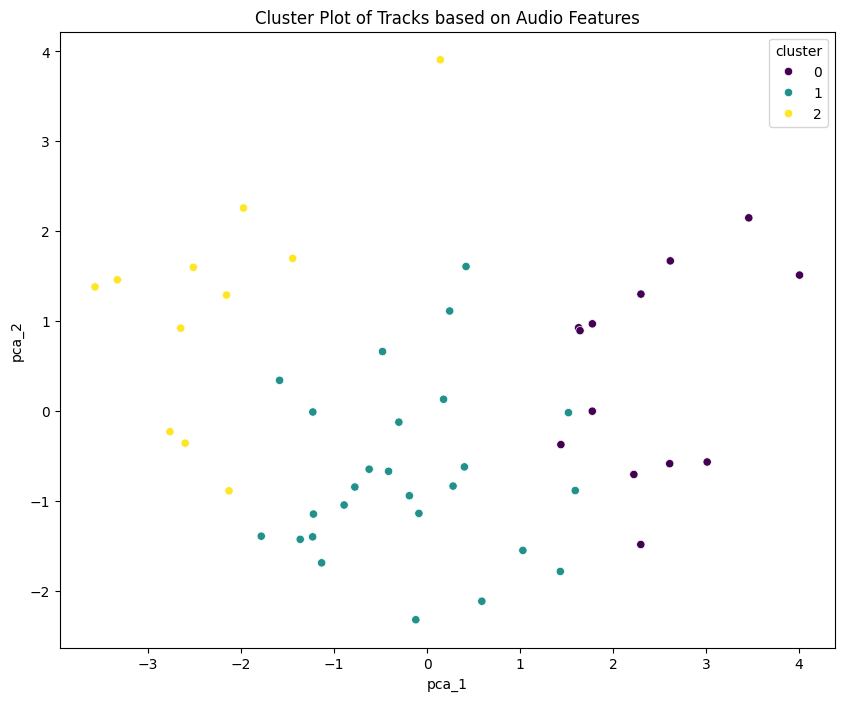

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X)
df['pca_1'] = components[:, 0]
df['pca_2'] = components[:, 1]

# Plot clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='pca_1', y='pca_2', hue='cluster', palette='viridis')
plt.title("Cluster Plot of Tracks based on Audio Features")
plt.show()


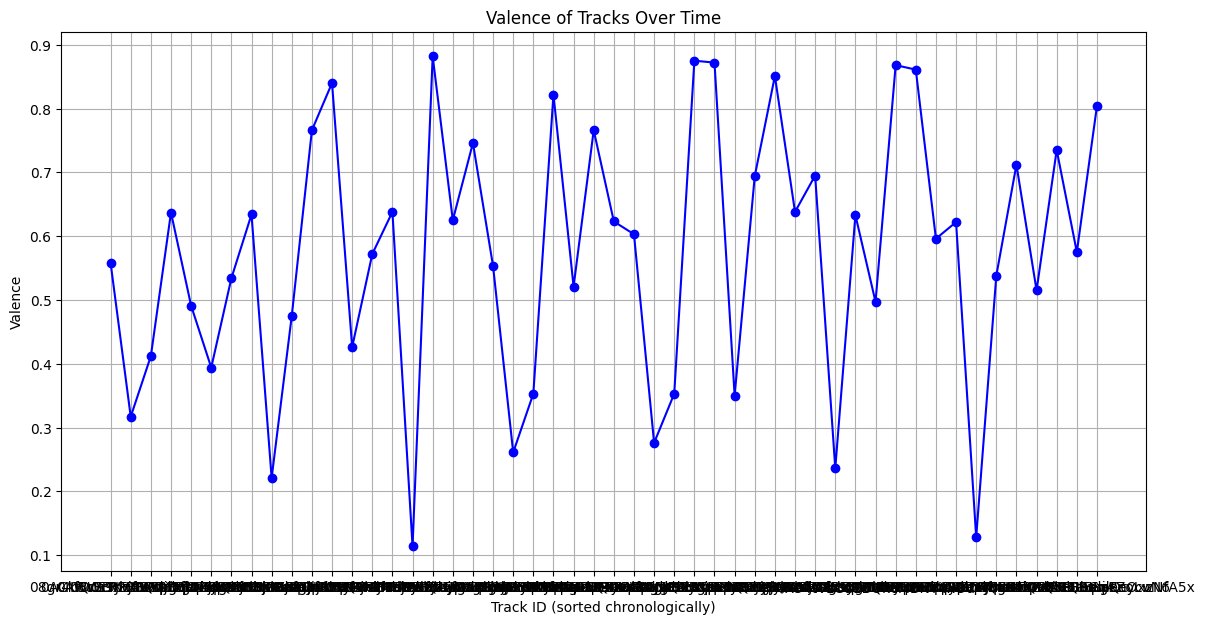

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the DataFrame has the relevant columns
if 'valence' in df.columns and 'duration_ms' in df.columns:
    # Convert duration from milliseconds to minutes
    df['duration_minutes'] = df['duration_ms'] / 60000

    # Assuming the 'id' column is unique for each track
    df_sorted = df.sort_values(by='id')

    # Plot valence over time
    plt.figure(figsize=(14, 7))
    plt.plot(df_sorted['id'], df_sorted['valence'], marker='o', linestyle='-', color='b')
    plt.xlabel('Track ID (sorted chronologically)')
    plt.ylabel('Valence')
    plt.title('Valence of Tracks Over Time')
    plt.grid(True)
    plt.show()
else:
    print("The DataFrame does not contain the required columns: 'valence' and 'duration_ms'")


Average Valence: 0.57


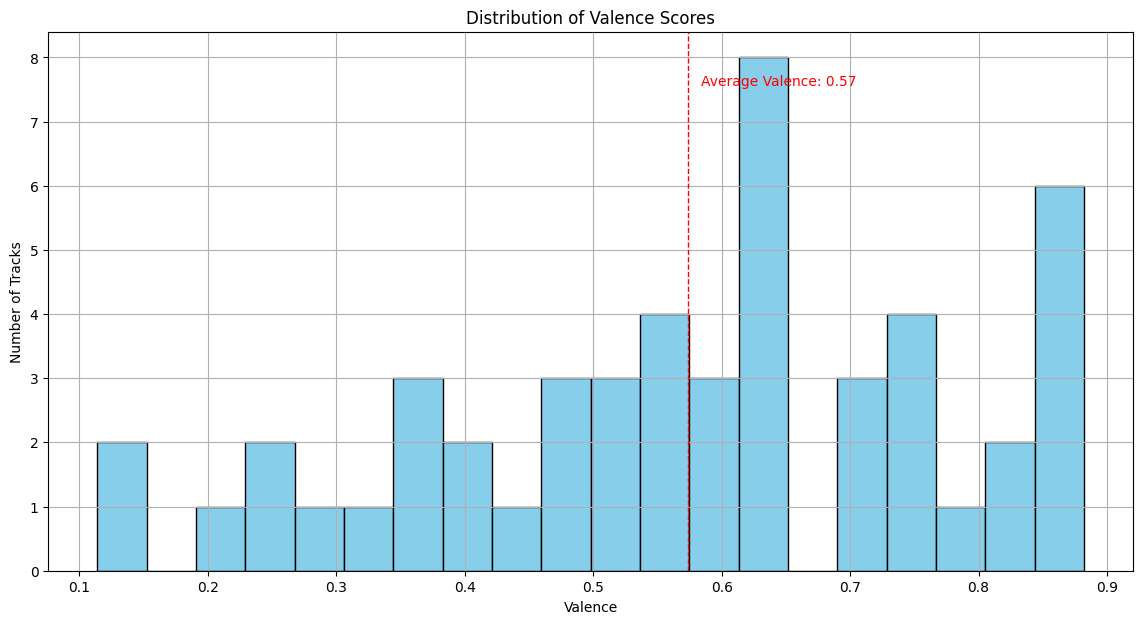

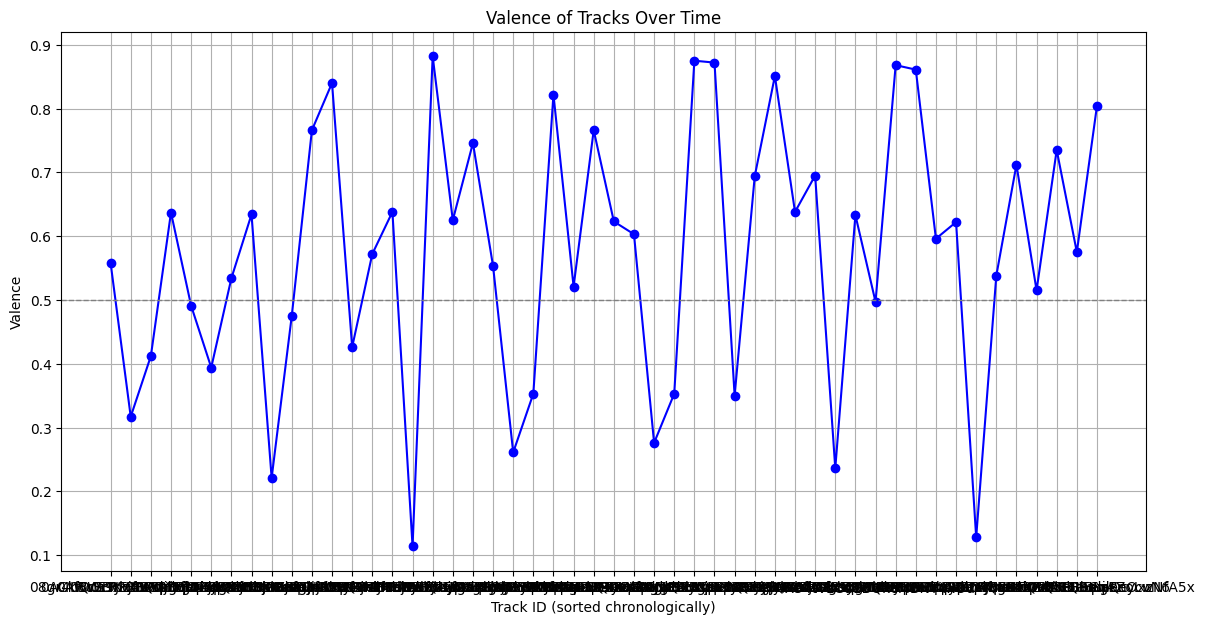

In [4]:
# Calculate the average valence
average_valence = df['valence'].mean()
print(f'Average Valence: {average_valence:.2f}')

# Plot the distribution of valence
plt.figure(figsize=(14, 7))
plt.hist(df['valence'], bins=20, color='skyblue', edgecolor='black')
plt.axvline(average_valence, color='red', linestyle='dashed', linewidth=1)
plt.text(average_valence+0.01, plt.ylim()[1]*0.9, f'Average Valence: {average_valence:.2f}', color='red')
plt.xlabel('Valence')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Valence Scores')
plt.grid(True)
plt.show()

# Assuming 'id' or another column represents chronological order
df_sorted = df.sort_values(by='id')

# Plot valence over time
plt.figure(figsize=(14, 7))
plt.plot(df_sorted['id'], df_sorted['valence'], marker='o', linestyle='-', color='b')
plt.xlabel('Track ID (sorted chronologically)')
plt.ylabel('Valence')
plt.title('Valence of Tracks Over Time')
plt.axhline(0.5, color='grey', linestyle='--', linewidth=1)  # Mood threshold line
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Example DataFrame (df) structure:
# df = pd.DataFrame({
#     'name': [...],
#     'artists': [...],  # Assume this is a string representation of lists
#     'id': [...],
#     ...
# })

# Preprocess the 'artists' column if it contains lists as strings
# Convert string representation of list to actual list
df['artists'] = df['artists'].apply(lambda x: x.split(', '))

# Flatten the list of artists and count occurrences
all_artists = [artist for sublist in df['artists'] for artist in sublist]
artist_counts = Counter(all_artists)

# Convert to a DataFrame for easier plotting
artist_counts_df = pd.DataFrame(artist_counts.items(), columns=['artist', 'count'])
artist_counts_df = artist_counts_df.sort_values(by='count', ascending=False)

# Print the top 10 most common artists
print(artist_counts_df.head(10))

# Plot the top 10 most common artists
plt.figure(figsize=(14, 7))
plt.barh(artist_counts_df.head(10)['artist'][::-1], artist_counts_df.head(10)['count'][::-1], color='skyblue')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Top 10 Most Common Artists in Your Data')
plt.grid(True)
plt.show()


SyntaxError: invalid syntax (<unknown>, line 1)